In [1]:
# Install RDKit.
# %%capture
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 22.2 MB/s eta 0:00:00


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem.rdmolops import PatternFingerprint
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('/content/Heteroaromatics.xlsx')

In [4]:
df

,Smiles
0,CN1C=CC=C1
1,C1=CC=CN1
2,C1=CN=CC=C1
3,CC1=NC=CC=C1
4,CC1=CC=NC=C1
5,CC1=C(C)C=NC=C1
6,CC1=NC(C)=CC=C1
7,CC(C)(C)C1=NC(C(C)(C)C)=CC=C1
8,CC1=NC(C)=CC(C)=C1
9,FC1=NC=CC=C1


# **Generating molecular objects from SMILES**

In [5]:
# Creating molecular object from Smiles

PandasTools.AddMoleculeColumnToFrame(df,'Smiles','mol')

,Smiles,mol
0,CN1C=CC=C1,
1,C1=CC=CN1,
2,C1=CN=CC=C1,
3,CC1=NC=CC=C1,
4,CC1=CC=NC=C1,
5,CC1=C(C)C=NC=C1,
6,CC1=NC(C)=CC=C1,
7,CC(C)(C)C1=NC(C(C)(C)C)=CC=C1,
8,CC1=NC(C)=CC(C)=C1,
9,FC1=NC=CC=C1,

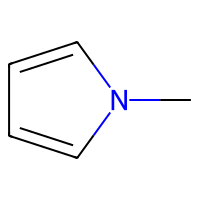
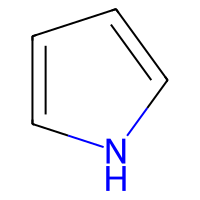
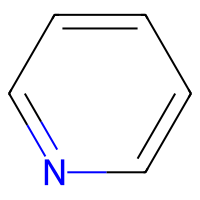
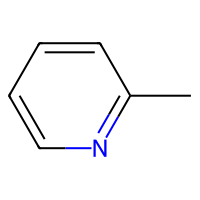
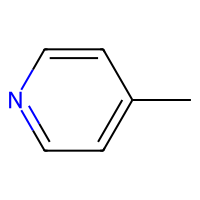
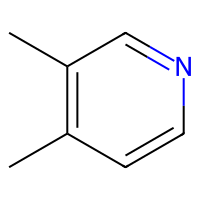
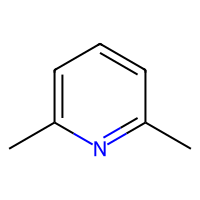
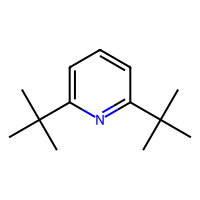
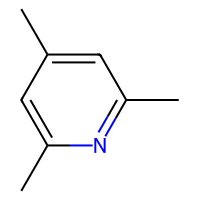
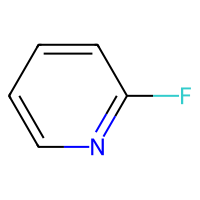
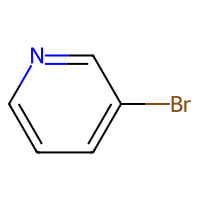
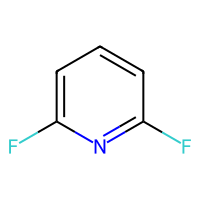
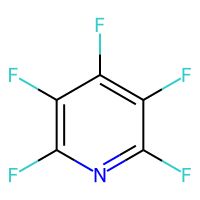
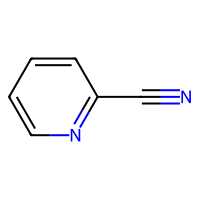

In [6]:
df

# **MACCS-keys**

In [7]:
# create an empty list
df_maccs = []

# run a for loop to iterate through each molecule
for mol in df['mol']:
# generate bitvector object
  maccs_bitvector = MACCSkeys.GenMACCSKeys(mol)
# create an empty array
  arr = np.zeros((0,), dtype=np.int8)
# convert the RDKit explicit vectors into numpy arrays
  DataStructs.ConvertToNumpyArray(maccs_bitvector,arr)
# append the array to the empty list
  df_maccs.append(arr)

MACCS = pd.concat([df, pd.DataFrame(df_maccs)], axis=1)

In [8]:
MACCS.head()

,Smiles,mol,0,1,2,3,4,5,6,7,...,157,158,159,160,161,162,163,164,165,166
0,CN1C=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7969e5e029d0>,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,1,0
1,C1=CC=CN1,<rdkit.Chem.rdchem.Mol object at 0x7969e5e02a40>,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,C1=CN=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7969e5e02ab0>,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
3,CC1=NC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7969e5e02b20>,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,0
4,CC1=CC=NC=C1,<rdkit.Chem.rdchem.Mol object at 0x7969e5e02b90>,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,0


In [9]:
MACCSkeys.GenMACCSKeys(df['mol'][0])

In [10]:
MACCS.drop('mol', axis=1).to_excel('maccs.xlsx', index=None)
MACCS.drop('mol', axis=1).to_csv('maccs.csv', index=None)

## **Pattern Figerprints**


In [11]:
df_pf = []
for mol in df['mol']:
  pf_bitvector = PatternFingerprint(mol)
  arr = np.zeros((0,), dtype=np.int8)
  DataStructs.ConvertToNumpyArray(pf_bitvector,arr)
  df_pf.append(arr)

PF = pd.concat([df, pd.DataFrame(df_pf)], axis=1)

In [12]:
PF.head()

,Smiles,mol,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CN1C=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7969e5e029d0>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,C1=CC=CN1,<rdkit.Chem.rdchem.Mol object at 0x7969e5e02a40>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,C1=CN=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7969e5e02ab0>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CC1=NC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7969e5e02b20>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC1=CC=NC=C1,<rdkit.Chem.rdchem.Mol object at 0x7969e5e02b90>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
PF.drop('mol', axis=1).to_excel('Pattern_fingerprint.xlsx', index=None)